<a href="https://colab.research.google.com/github/jbonesTroy/Intro-to-Machine-Learning/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Manual CV] Best k = 13, CV Accuracy = 0.9800


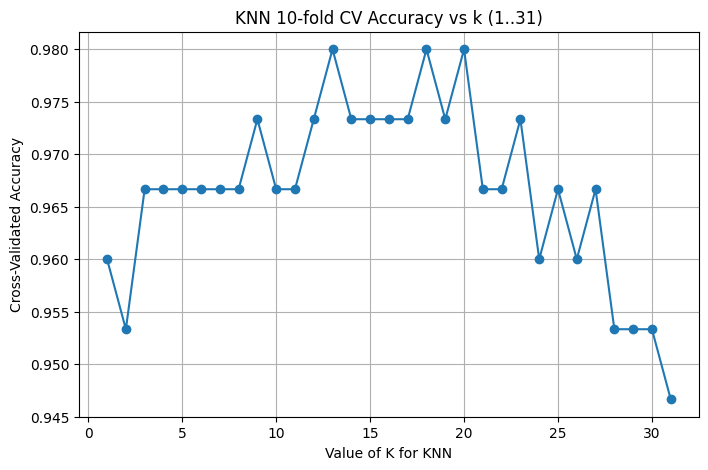

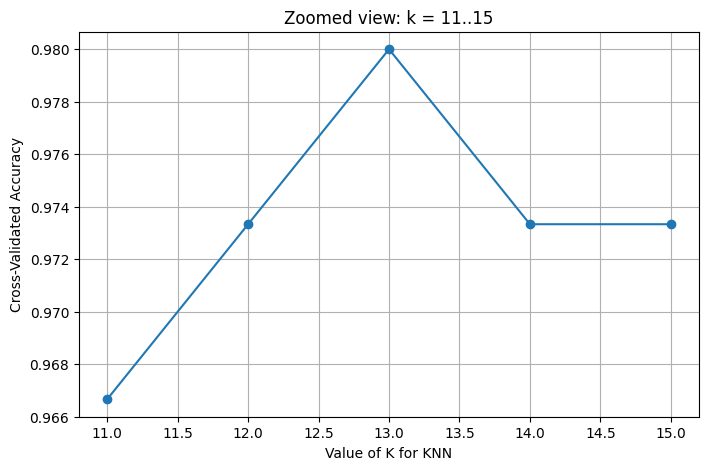

[GridSearchCV] Best k = 13, CV Accuracy = 0.9800


In [1]:
# Ex 15.8 — Iris KNN Hyperparameter Tuning
# Requirements met:
# (1) Use sklearn Iris dataset
# (2) Use cross_val_score(..., cv=10) — DO NOT pass a KFold object here
# (3) Evaluate k=1..31, plot accuracy vs k (full + zoomed 11..15)
# (4) Confirm best k with GridSearchCV (expect k=13)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# 1) Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2) Sweep k using cross_val_score with cv=10 (10-fold CV)
k_range = range(1, 32)   # 1..31 inclusive
means, stds = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)   # <-- EXACTLY as required
    means.append(scores.mean())
    stds.append(scores.std())

# 3) Find optimal k and show plots
results = pd.DataFrame({"k": list(k_range), "mean_acc": means, "std_acc": stds})
best_row = results.loc[results["mean_acc"].idxmax()]
best_k, best_acc = int(best_row.k), float(best_row.mean_acc)
print(f"[Manual CV] Best k = {best_k}, CV Accuracy = {best_acc:.4f}")

# Plot A: full 1..31
plt.figure(figsize=(8,5))
plt.plot(results["k"], results["mean_acc"], marker="o")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN 10-fold CV Accuracy vs k (1..31)")
plt.grid(True)
plt.show()

# Plot B: zoomed 11..15
plt.figure(figsize=(8,5))
zoom = results[(results["k"] >= 11) & (results["k"] <= 15)]
plt.plot(zoom["k"], zoom["mean_acc"], marker="o")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Zoomed view: k = 11..15")
plt.grid(True)
plt.show()

# 4) GridSearchCV confirmation (also cv=10, no KFold object)
param_grid = {"n_neighbors": list(range(1, 32))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X, y)

print(f"[GridSearchCV] Best k = {grid.best_params_['n_neighbors']}, "
      f"CV Accuracy = {grid.best_score_:.4f}")
